<a href="https://colab.research.google.com/github/DMGravina/C-digos-de-aprendizado-em-Machine-Learning/blob/main/Projeto_ML_com_KNN_(comentado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução ao problema


As fraudes em transações com cartão de crédito representam uma ameaça significativa para instituições financeiras e consumidores. Estima-se que bilhões de dólares são perdidos anualmente em todo o mundo devido a operações fraudulentas. Esses prejuízos não se limitam apenas a perdas financeiras diretas, mas também afetam a confiança dos clientes e podem comprometer a reputação das empresas do setor.

Diante desse cenário, o objetivo deste projeto é desenvolver um modelo preditivo baseado em técnicas de Machine Learning que seja capaz de identificar automaticamente transações suspeitas, permitindo à empresa agir rapidamente para mitigar os impactos da fraude. Uma transação fraudulenta é definida como qualquer operação realizada com cartão de crédito sem o conhecimento ou consentimento do titular. Essas transações geralmente são feitas por indivíduos mal-intencionados que obtêm os dados do cartão de forma ilegal, com o intuito de obter ganhos financeiros indevidos.

## Importação das bibliotecas

Aqui serão importadas as bibliotecas que serão usadas ao longo do código. As funções a serem utilizadas são padronização de dados, plotagem de informações, KNN por classificação e avaliação do modelo por acurácia.

In [ ]:
#[4, 1, 22, 9, 7, 18, 1, 22, 9, 14, 1]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 2. Análise de dados


A partir de agora, serão apresentados os dados em si, seus tipos e estruturas.

In [ ]:
#[4, 1, 22, 9, 7, 18, 1, 22, 9, 14, 1]
data = pd.read_csv("card_transdata.csv")
print(data.head(6))
print()
print(data.tail(6))

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   
5            5.586408                       13.261073   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   
5                        0.064768              1.0        0.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0

- Estrutura dos Dados:

In [ ]:
print(data.dtypes)
print()
print(data.describe())

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  10

# 3. Limpeza de dados

Aqui ocorrerá a verificação de valores ausentes ou nulos, e a exclusão de colunas que não apresentam utilidade para o aprendizado.

In [ ]:
#[4, 1, 22, 9, 7, 18, 1, 22, 9, 14, 1]
data.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


>Sem valores ausentes, ou dados faltantes.

- Retirada de valores sem utilidade:

In [ ]:
data.drop("distance_from_home", axis=1, inplace=True)

>A coluna "*distance_from_home* " foi removida dos dados gerais.

# 4. Pré-processamento

O pré-processamento do aprendizado será baseado no uso da "*train_test_split*" para organizar os dados de teste e de treino, e no uso da "*StandardScaler*" para evitar que variáveis com valores maiores dominem o aprendizado (padronização). Será definido que os valores de entrada serão os dados disponibilizados, com exceção da coluna "*fraud*", que será o alvo dos valores de saída.

- Definição de "x" e "y":

In [ ]:
#[4, 1, 22, 9, 7, 18, 1, 22, 9, 14, 1]
x = data.drop("fraud", axis=1)
y = data["fraud"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

>Foram definidas 2 variáveis de entrada e 2 de saída. Um par é voltado ao treino e o outro é voltado ao teste.

- Padronização dos Dados:

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

>Os Dados gerais (menos os da variável "*fraud* ") foram padronizados e organizados. Na variável de treino, foi possível calcular o desvio padrão das informações por meio da "*.fit* ".

# 5. Modelagem

Aqui ocorrerá a implementação do KNeighborsClassifier e da predição em si. Para comparar a variedade dos resultados em relação da quantidade de vizinhos, serão feitos dois testes, um com '*k* ' valendo 5 (padrão) e outro em que '*k* ' vale 8.

## + Aprendizado da máquina com 5 neighbors

- Implementação do "*KNeighborsClassifier* ":

In [ ]:
#[4, 1, 22, 9, 7, 18, 1, 22, 9, 14, 1]
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

>O modelo foi treinado com classificação de neighbors pelo comando "*model.fit* ".

- Predição do modelo sobre os dados de treino e de teste:

In [ ]:
predict_train = model.predict(x_train_scaled)
predict_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
predict_test = model.predict(x_test_scaled)
predict_test

array([0., 0., 0., ..., 1., 0., 0.])

>Os valores foram preditos em 0 para "Não-Fraude" e 1 para "Fraude".

## + Aprendizado da máquina com 8 neighbors

- Implementação do "*KNeighborsClassifier* " com 8 vizinhos:

In [ ]:
#[4, 1, 22, 9, 7, 18, 1, 22, 9, 14, 1]
model2 = KNeighborsClassifier(n_neighbors=8)
model2.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

- Predição do modelo para treino e teste:

In [ ]:
predito_train = model2.predict(x_train_scaled)
predito_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
predito_test = model2.predict(x_test_scaled)
predito_test

array([0., 0., 0., ..., 1., 0., 0.])

>Para organizar: existem agora 2 modelos, o "*model* " (5) e o "*model2* " (8); e 4 valores de saída, "*predict_train* ", "*predict_test* ", "*predito_train* " e "*predito_test* ".

# 6. Validação

Aqui será avaliada a qualidade do modelo em prever aquilo que estamos buscando. A avaliação será baseada na acurácia e haverá uma matriz de confusão para melhor entendimento.

## Comparação da acurácia com 5 neighbors:

O "*accuracy_score* " está sendo utilizado para medir a acurácia entre o valor esperado (y) e o apresentado pelo modelo (predict):

In [ ]:
accuracy_score(y_train, predict_train)

0.98096875

In [ ]:
accuracy_score(y_test, predict_test)

0.9804

>A proporção de acertos em relação ao número total de previsões feitas, nos dois casos, é de aproximadamente 98%. Isso demonstra que o modelo aprendeu de maneira razoável o padrão geral dos dados, pois a acurácia do teste é quase igual a do treino, ficando entre 98,09% e 98,04%.

- Matriz de Confusão:

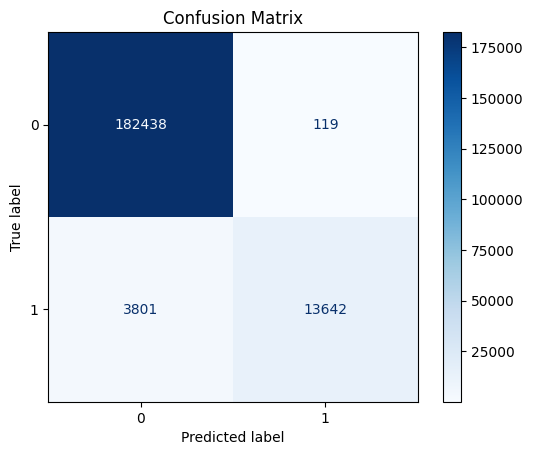

In [ ]:
#[4, 1, 22, 9, 7, 18, 1, 22, 9, 14, 1]
mc = confusion_matrix(y_test, predict_test)

disp = ConfusionMatrixDisplay(confusion_matrix = mc)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

>A matriz mostra que o modelo teve mais sucesso em identificar não-fraudes do que de fato, fraudes.
>- Um problema revelado por essa matriz é a quantidade de casos de fraude em que o modelo falhou ao indentificar e considerou como não-fraude.
>- Por outro lado, a quantidade de casos onde uma matriz considerou situações de não-fraudes como fraudes foi inferior aos demais casos.

>Contudo, considerando que o modelo tem por objetivo a identificação de fraudes específicamente, pode-se dizer que ele não está tão bom. Embora sua acurácia em acertos esteja aceitável, a quantidade de fraudes que ele não conseguiu identificar está muito elevada, considerando que é um fator de risco. Somente 78% das previsões de fraude foram bem-sucedidas.

## Comparação da acurácia com 8 neighbors:

O "accuracy_score " está sendo utilizado para medir a acurácia entre o valor esperado (y) e o apresentado pelo modelo (predito):

In [ ]:
accuracy_score(y_train, predito_train)

0.98073875

In [ ]:
accuracy_score(y_test, predito_test)

0.980735

>A proporção de acertos em relação ao número total de previsões feitas, nos dois casos, é de aproximadamente 98%. Porém, neste caso, o modelo aprendeu de maneira superior o padrão geral dos dados, em comparação ao anterior, pois a acurácia do teste é quase igual a do treino. Essa melhora na acurácia pode ter sido causada pelo aumento da quantidade de vizinhos.

- Matriz de Confusão:

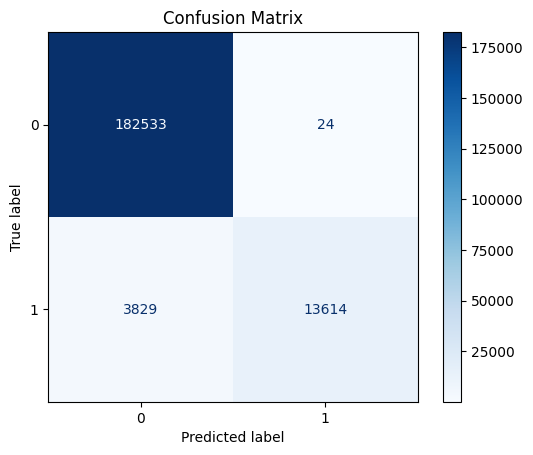

In [ ]:
#[4, 1, 22, 9, 7, 18, 1, 22, 9, 14, 1]
mc2 = confusion_matrix(y_test, predito_test)

disp = ConfusionMatrixDisplay(confusion_matrix = mc2)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

>Essa matriz também mostra que o modelo teve mais sucesso em identificar não-fraudes do que de fato, fraudes.
>- Com o número de vizinhos tendo aumentado, foi possível observar com mais precisão o padrão de valores, o que fez com que a quantidade de erros do modelo em considerar não-fraudes como fraudes diminuísse drasticamente.
>- Porém isso acabou piorando a situação anterior, fazendo com que o número de falhas ao identificar uma fraude legítima aumentasse.

>Com isso, foi possível perceber que o aumento de vizinhos não foi um processo tão vantajoso neste caso, embora tenha diminuído a identificação de falsas fraudes, a falha na identificação de fraudes verdadeiras aumentou em 0,7% e a predição bem-sucedida de fraudes diminuiu em 0,2%.


# 7. Conclusão

## Sobre o modelo e suas possíveis melhorias

O modelo de Machine Learning desenvolvido aqui é baseado em KNN por classificação. Ao organizar, estruturar e padronizar os dados recebidos, foi possível ensinar o modelo a prever fraudes de  cartão de crédito, identificando quais transações eram e quais não eram fraudes.

A acurácia apresentada pelo modelo se mostrou agradável, representando uma grande porcentagem de acertos em predição de casos (o número de acertos é quase 5000% maior do que o número de erros), contudo, ainda deixa a desejar. A quantidade de erros de predição se mostra alta quando é levado em considerção o risco oferecido nesses casos, e mesmo que se mude o número de vizinhos para classificação, ainda não apresenta números tão agradáveis.

---



O que pode ser melhorado para tornar o modelo mais preciso em seu objetivo é a quantidade de vizinhos definidos:
- Embora o aumento de 5 para 8 tenha dado resultados desagradáveis, isso provavelmente se deu por os vizinhos adicionados no aumento ajudarem o modelo a prever não-fraudes em sua maioria.
- A evidência disso é o fato de o aumento para 8 vizinhos ter diminuído drasticamente a quantidade de FP (falsos positivos), mostrando um inegável ajuste, porém, se esse ajuste tiver ensinado o modelo a identificar mais os padrões de uma não-fraude, seria plausível que o numero de erros ao identificar fraudes aumentasse.
- Caso fosse definido um número maior de vizinhos, é provável que haja um número de casos de fraude maior, permitindo que o modelo identifique com mais acertividade a situações desejadas por meio de novos padrões.

## Sobre o aprimoramento do modelo

Uma alternativa para aprimorar o modelo seria optar por outro algorítmo:
- O KNN pode é inegavelmente um poderoso algorítmo para Machine Learning, porém muitas vezes não cumpre com o objetivo serne da situação.
- Classificar valores por proximidade nem sempre fará sentido, pois podem haver situações em que os alvos estão isolados e não tenham relação com aqueles à sua volta.
- Uma solução inteligente neste caso é o uso do algorítmo *Árvore de Decisão*, pois a cada passo, o algoritmo toma uma decisão com base em uma condição lógica sobre uma das variáveis. Assim, em vez de inferência, o modelo trabalharia com razão e condição.